In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import mnist
sns.set_style('whitegrid')

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
type(X_train)

numpy.ndarray

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train[0].shape

(28, 28)

In [8]:
y_train[0]

5

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

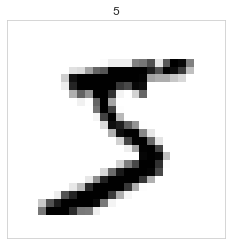

In [10]:
plt.imshow(X_train[0],cmap='gray_r')
plt.title(y_train[0])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
y_train[0]

5

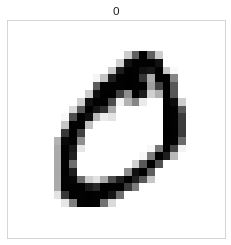

In [12]:
plt.imshow(X_train[1],cmap='gray_r')
plt.title(y_train[1])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

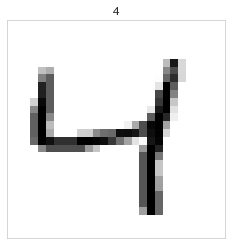

In [13]:
plt.imshow(X_train[2],cmap='gray_r')
plt.title(y_train[2])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

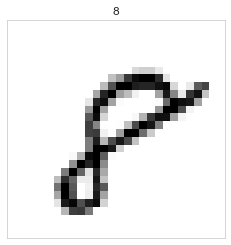

In [15]:
plt.imshow(X_train[59999],cmap='gray_r')
plt.title(y_train[59999])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

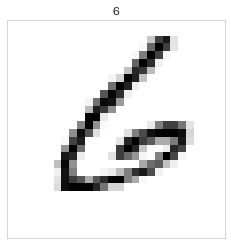

In [16]:
plt.imshow(X_train[59998],cmap='gray_r')
plt.title(y_train[59998])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

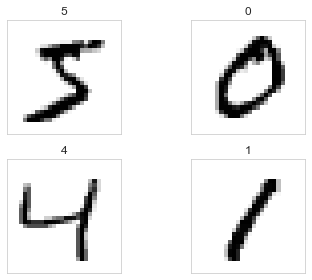

In [17]:
for i in range(4):
    plt.subplot(220 + 1 + i)
    plt.imshow(X_train[i],cmap='gray_r')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()    
plt.show()

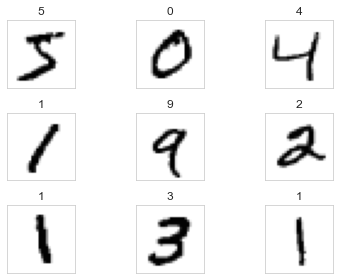

In [18]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i],cmap='gray_r')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()    
plt.show()

In [19]:
# normalization and casting

In [20]:
X_train,X_test = X_train/255.0,X_test/255.0

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

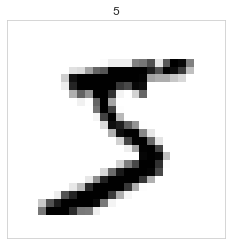

In [22]:
plt.imshow(X_train[0],cmap='gray_r')
plt.title(y_train[0])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2008 - accuracy: 0.9406
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0817 - accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0515 - accuracy: 0.9836
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0390 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0275 - accuracy: 0.9911


In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0606 - accuracy: 0.9819


[0.06056712195277214, 0.9818999767303467]

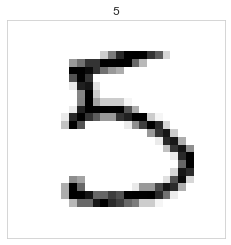

In [28]:
plt.imshow(X_test[15],cmap='gray_r')
plt.title(y_test[15])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [29]:
X_test[5].shape

(28, 28)

In [30]:
X_test[5].reshape(1,28,28)

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [31]:
model.predict(X_test[15].reshape(1,28,28))

array([[7.7294261e-11, 3.5568737e-09, 5.6483369e-08, 1.3205117e-05,
        7.7742766e-13, 9.9996948e-01, 3.3980863e-09, 2.0101083e-08,
        1.6879747e-05, 3.1814056e-07]], dtype=float32)

In [32]:
model.predict(X_test[15].reshape(1,28,28)).round(3)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [33]:
np.argmax(model.predict(X_test[15].reshape(1,28,28)))

5